In [1]:
import pandas as pd
import numpy as np
from unidecode import unidecode
import requests
import sqlite3
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

***Flat File***

In [3]:
Salaries = pd.read_csv('C:/Users/blain/Desktop/DSC540/mlbSalaries.csv')
Salaries

,year,team,name,salary,playerID
0,2019,arizona-diamondbacks,Eduardo Escobar,6166666,500871
1,2019,arizona-diamondbacks,Robbie Ray,6050000,592662
2,2019,arizona-diamondbacks,Taijuan Walker,5025000,592836
3,2019,arizona-diamondbacks,Jake Lamb,4825000,571875
4,2019,arizona-diamondbacks,Adam Jones,4500000,430945
...,...,...,...,...,...
2335,2021,washington-nationals,Ryne Harper,340437,607560
2336,2021,washington-nationals,Tres Barrera,295008,668663
2337,2021,washington-nationals,Andres Machado,291365,600921
2338,2021,washington-nationals,Alcides Escobar,282164,444876


Step #1

As this project is only focused on data from the year 2021, the other years of data will be dropped.

In [4]:
Salaries = Salaries[Salaries['year'] == 2021]
Salaries

,year,team,name,salary,playerID
52,2021,arizona-diamondbacks,Nick Ahmed,8125000,605113
53,2021,arizona-diamondbacks,Kole Calhoun,8000000,594777
54,2021,arizona-diamondbacks,Eduardo Escobar,7666668,500871
55,2021,arizona-diamondbacks,David Peralta,7500000,444482
56,2021,arizona-diamondbacks,Merrill Kelly,4250000,518876
...,...,...,...,...,...
2335,2021,washington-nationals,Ryne Harper,340437,607560
2336,2021,washington-nationals,Tres Barrera,295008,668663
2337,2021,washington-nationals,Andres Machado,291365,600921
2338,2021,washington-nationals,Alcides Escobar,282164,444876


Step #2

The year column is no longer necessary, as all remaining data is from 2021, so it's dropped.

In addition, the playerID column is not useful to this project, especially with several players having IDs of 0, so that column is dropped as well.

In [5]:
Salaries = Salaries.drop(['year','playerID'], axis=1)
Salaries

,team,name,salary
52,arizona-diamondbacks,Nick Ahmed,8125000
53,arizona-diamondbacks,Kole Calhoun,8000000
54,arizona-diamondbacks,Eduardo Escobar,7666668
55,arizona-diamondbacks,David Peralta,7500000
56,arizona-diamondbacks,Merrill Kelly,4250000
...,...,...,...
2335,washington-nationals,Ryne Harper,340437
2336,washington-nationals,Tres Barrera,295008
2337,washington-nationals,Andres Machado,291365
2338,washington-nationals,Alcides Escobar,282164


Step #3

Update column headers to be more descriptive and include capitalization.

In [6]:
Salaries = Salaries.rename(columns={'team': 'Full_Team_Name', 'name': 'Full_Name', 'salary': 'Salary'})
Salaries

,Full_Team_Name,Full_Name,Salary
52,arizona-diamondbacks,Nick Ahmed,8125000
53,arizona-diamondbacks,Kole Calhoun,8000000
54,arizona-diamondbacks,Eduardo Escobar,7666668
55,arizona-diamondbacks,David Peralta,7500000
56,arizona-diamondbacks,Merrill Kelly,4250000
...,...,...,...
2335,washington-nationals,Ryne Harper,340437
2336,washington-nationals,Tres Barrera,295008
2337,washington-nationals,Andres Machado,291365
2338,washington-nationals,Alcides Escobar,282164


Step #4

Split player names into first and last name columns.

The below line will only place data into the first and last name columns if the player has exactly 2 names provided (or 1 space in their name).

In [7]:
Salaries[['First_Name','Last_Name']] = Salaries['Full_Name'].loc[Salaries['Full_Name'].str.split().str.len() == 2].str.split(expand=True)
Salaries

,Full_Team_Name,Full_Name,Salary,First_Name,Last_Name
52,arizona-diamondbacks,Nick Ahmed,8125000,Nick,Ahmed
53,arizona-diamondbacks,Kole Calhoun,8000000,Kole,Calhoun
54,arizona-diamondbacks,Eduardo Escobar,7666668,Eduardo,Escobar
55,arizona-diamondbacks,David Peralta,7500000,David,Peralta
56,arizona-diamondbacks,Merrill Kelly,4250000,Merrill,Kelly
...,...,...,...,...,...
2335,washington-nationals,Ryne Harper,340437,Ryne,Harper
2336,washington-nationals,Tres Barrera,295008,Tres,Barrera
2337,washington-nationals,Andres Machado,291365,Andres,Machado
2338,washington-nationals,Alcides Escobar,282164,Alcides,Escobar


30 players did not convert in this process, either due to too many names or too few (bad data).

In [8]:
Salaries[Salaries['First_Name'].isnull()]

,Full_Team_Name,Full_Name,Salary,First_Name,Last_Name
67,arizona-diamondbacks,Bukauskas,515256,NaN,NaN
74,arizona-diamondbacks,Brett de Geus,303633,NaN,NaN
142,atlanta-braves,Minter,1300000,NaN,NaN
219,baltimore-orioles,Stewart,577000,NaN,NaN
287,boston-red-sox,Martinez,19350000,NaN,NaN
623,cleveland-indians,Johnson,269896,NaN,NaN
688,colorado-rockies,Chi Chi Gonzalez,1100000,NaN,NaN
690,colorado-rockies,Cron,1000000,NaN,NaN
933,kansas-city-royals,Hearn,404844,NaN,NaN
1068,los-angeles-dodgers,Pollock,18000000,NaN,NaN


Players with more than 2 names are converted manually. As roster information is readily available elsewhere, the players with bad data in the name field can also be fixed manually.

In [9]:
Salaries.loc[67, ['Full_Name','First_Name','Last_Name']] = ['J.B. Bukauskas','J.B.','Bukauskas']
Salaries.loc[74, ['First_Name','Last_Name']] = ['Brett ','de Geus']
Salaries.loc[142, ['Full_Name','First_Name','Last_Name']] = ['A.J. Minter','A.J.','Minter']
Salaries.loc[219, ['Full_Name','First_Name','Last_Name']] = ['DJ Stewart','DJ','Stewart']
Salaries.loc[287, ['Full_Name','First_Name','Last_Name']] = ['J.D. Martinez','J.D.','Martinez']
Salaries.loc[623, ['Full_Name','First_Name','Last_Name']] = ['DJ Johnson','DJ','Johnson']
Salaries.loc[688, ['First_Name','Last_Name']] = ['Chi Chi','Gonzalez']
Salaries.loc[690, ['Full_Name','First_Name','Last_Name']] = ['C.J. Cron','C.J.','Cron']
Salaries.loc[933, ['Full_Name','First_Name','Last_Name']] = ['Ryan O\'Hearn','Ryan','O\'Hearn']
Salaries.loc[1068, ['Full_Name','First_Name','Last_Name']] = ['AJ Pollock','AJ','Pollock']

In [10]:
Salaries.loc[1225, ['First_Name','Last_Name']] = ['Jackie','Bradley Jr']
Salaries.loc[1305, ['Full_Name','First_Name','Last_Name']] = ['J.A. Happ','J.A.','Happ']
Salaries.loc[1458, ['Full_Name','First_Name','Last_Name']] = ['DJ LeMahieu','DJ','LeMahieu']
Salaries.loc[1549, ['Full_Name','First_Name','Last_Name']] = ['J.B. Wendelken','J.B.','Wendelken']
Salaries.loc[1617, ['Full_Name','First_Name','Last_Name']] = ['J.T. Realmuto','J.T.','Realmuto']
Salaries.loc[1633, ['First_Name','Last_Name']] = ['Enyel','De Los Santos']
Salaries.loc[1705, ['Full_Name','First_Name','Last_Name']] = ['Ke\'Bryan Hayes','Ke\'Bryan','Hayes']
Salaries.loc[1711, ['First_Name','Last_Name']] = ['Chase','De Jong']
Salaries.loc[1772, ['Full_Name','First_Name','Last_Name']] = ['Ha-Seong Kim','Ha-Seong','Kim']
Salaries.loc[1778, ['First_Name','Last_Name']] = ['Fernando','Tatis Jr']

In [11]:
Salaries.loc[1792, ['Full_Name','First_Name','Last_Name']] = ['Brian O\'Grady','Brian','O\'Grady']
Salaries.loc[1929, ['Full_Name','First_Name','Last_Name']] = ['J.P. Crawford','J.P.','Crawford']
Salaries.loc[1943, ['Full_Name','First_Name','Last_Name']] = ['JT Chargois','JT','Chargois']
Salaries.loc[2009, ['Full_Name','First_Name','Last_Name']] = ['Kwang Hyun Kim','Kwang Hyun','Kim']
Salaries.loc[2015, ['Full_Name','First_Name','Last_Name']] = ['Tyler O\'Neill','Tyler','O\'Neill']
Salaries.loc[2084, ['Full_Name','First_Name','Last_Name']] = ['Ji Man Choi','Ji Man','Choi']
Salaries.loc[2101, ['Full_Name','First_Name','Last_Name']] = ['J.P. Feyereisen','J.P.','Feyereisen']
Salaries.loc[2237, ['Full_Name','First_Name','Last_Name']] = ['Hyun Jin Ryu','Hyun Jin','Ryu']
Salaries.loc[2243, ['First_Name','Last_Name']] = ['Lourdes','Gurriel Jr']
Salaries.loc[2246, ['First_Name','Last_Name']] = ['Vladimir','Guerrero Jr']

In [12]:
Salaries.loc[67]

Full_Team_Name    arizona-diamondbacks
Full_Name               J.B. Bukauskas
Salary                          515256
First_Name                        J.B.
Last_Name                    Bukauskas
Name: 67, dtype: object

In [13]:
Salaries.loc[74]

Full_Team_Name    arizona-diamondbacks
Full_Name                Brett de Geus
Salary                          303633
First_Name                      Brett 
Last_Name                      de Geus
Name: 74, dtype: object

Checking for duplicate values, there are 2 players that share a name (Will Smith of the LA Dodgers, and Will Smith of the ATL Braves).

In [14]:
Salaries.loc[Salaries.duplicated(subset=['Full_Name'], keep=False) == True]

,Full_Team_Name,Full_Name,Salary,First_Name,Last_Name
132,atlanta-braves,Will Smith,13000000,Will,Smith
1080,los-angeles-dodgers,Will Smith,590500,Will,Smith


Step #5

Add a column that converts team name from the format "location-name" to a 3 letter abbreviation to match the other data sources.

First, a function is written that converts the team name.

In [15]:
def team_conversion (row):
    if row['Full_Team_Name'] == 'arizona-diamondbacks':
        return 'ARI'
    if row['Full_Team_Name'] == 'atlanta-braves':
        return 'ATL'
    if row['Full_Team_Name'] == 'baltimore-orioles':
        return 'BAL'
    if row['Full_Team_Name'] == 'boston-red-sox':
        return 'BOS'
    if row['Full_Team_Name'] == 'chicago-cubs':
        return 'CHC'
    if row['Full_Team_Name'] == 'chicago-white-sox':
        return 'CHW'
    if row['Full_Team_Name'] == 'cincinnati-reds':
        return 'CIN'
    if row['Full_Team_Name'] == 'cleveland-indians':
        return 'CLE'
    if row['Full_Team_Name'] == 'colorado-rockies':
        return 'COL'
    if row['Full_Team_Name'] == 'detroit-tigers':
        return 'DET'
    if row['Full_Team_Name'] == 'houston-astros':
        return 'HOU'
    if row['Full_Team_Name'] == 'kansas-city-royals':
        return 'KCR'
    if row['Full_Team_Name'] == 'los-angeles-angels':
        return 'LAA'
    if row['Full_Team_Name'] == 'los-angeles-dodgers':
        return 'LAD'
    if row['Full_Team_Name'] == 'miami-marlins':
        return 'MIA'
    if row['Full_Team_Name'] == 'milwaukee-brewers':
        return 'MIL'
    if row['Full_Team_Name'] == 'minnesota-twins':
        return 'MIN'
    if row['Full_Team_Name'] == 'new-york-mets':
        return 'NYM'
    if row['Full_Team_Name'] == 'new-york-yankees':
        return 'NYY'
    if row['Full_Team_Name'] == 'oakland-athletics':
        return 'OAK'
    if row['Full_Team_Name'] == 'philadelphia-phillies':
        return 'PHI'
    if row['Full_Team_Name'] == 'pittsburgh-pirates':
        return 'PIT'
    if row['Full_Team_Name'] == 'san-diego-padres':
        return 'SDP'
    if row['Full_Team_Name'] == 'san-francisco-giants':
        return 'SFG'
    if row['Full_Team_Name'] == 'seattle-mariners':
        return 'SEA'
    if row['Full_Team_Name'] == 'st-louis-cardinals':
        return 'STL'
    if row['Full_Team_Name'] == 'tampa-bay-rays':
        return 'TBR'
    if row['Full_Team_Name'] == 'texas-rangers':
        return 'TEX'
    if row['Full_Team_Name'] == 'toronto-blue-jays':
        return 'TOR'
    if row['Full_Team_Name'] == 'washington-nationals':
        return 'WSN'

In [16]:
Salaries['Team_Abbreviation'] = Salaries.apply(lambda row: team_conversion(row), axis=1)
Salaries

,Full_Team_Name,Full_Name,Salary,First_Name,Last_Name,Team_Abbreviation
52,arizona-diamondbacks,Nick Ahmed,8125000,Nick,Ahmed,ARI
53,arizona-diamondbacks,Kole Calhoun,8000000,Kole,Calhoun,ARI
54,arizona-diamondbacks,Eduardo Escobar,7666668,Eduardo,Escobar,ARI
55,arizona-diamondbacks,David Peralta,7500000,David,Peralta,ARI
56,arizona-diamondbacks,Merrill Kelly,4250000,Merrill,Kelly,ARI
...,...,...,...,...,...,...
2335,washington-nationals,Ryne Harper,340437,Ryne,Harper,WSN
2336,washington-nationals,Tres Barrera,295008,Tres,Barrera,WSN
2337,washington-nationals,Andres Machado,291365,Andres,Machado,WSN
2338,washington-nationals,Alcides Escobar,282164,Alcides,Escobar,WSN


Step #6

Columns are re-ordered and the index is reset to just the 2021 player data to improve readability.

In [17]:
Salaries.index = range(len(Salaries.index))
Salaries

,Full_Team_Name,Full_Name,Salary,First_Name,Last_Name,Team_Abbreviation
0,arizona-diamondbacks,Nick Ahmed,8125000,Nick,Ahmed,ARI
1,arizona-diamondbacks,Kole Calhoun,8000000,Kole,Calhoun,ARI
2,arizona-diamondbacks,Eduardo Escobar,7666668,Eduardo,Escobar,ARI
3,arizona-diamondbacks,David Peralta,7500000,David,Peralta,ARI
4,arizona-diamondbacks,Merrill Kelly,4250000,Merrill,Kelly,ARI
...,...,...,...,...,...,...
775,washington-nationals,Ryne Harper,340437,Ryne,Harper,WSN
776,washington-nationals,Tres Barrera,295008,Tres,Barrera,WSN
777,washington-nationals,Andres Machado,291365,Andres,Machado,WSN
778,washington-nationals,Alcides Escobar,282164,Alcides,Escobar,WSN


In [18]:
Salaries = Salaries[['Team_Abbreviation','Full_Team_Name','Full_Name','First_Name','Last_Name','Salary']]
Salaries

,Team_Abbreviation,Full_Team_Name,Full_Name,First_Name,Last_Name,Salary
0,ARI,arizona-diamondbacks,Nick Ahmed,Nick,Ahmed,8125000
1,ARI,arizona-diamondbacks,Kole Calhoun,Kole,Calhoun,8000000
2,ARI,arizona-diamondbacks,Eduardo Escobar,Eduardo,Escobar,7666668
3,ARI,arizona-diamondbacks,David Peralta,David,Peralta,7500000
4,ARI,arizona-diamondbacks,Merrill Kelly,Merrill,Kelly,4250000
...,...,...,...,...,...,...
775,WSN,washington-nationals,Ryne Harper,Ryne,Harper,340437
776,WSN,washington-nationals,Tres Barrera,Tres,Barrera,295008
777,WSN,washington-nationals,Andres Machado,Andres,Machado,291365
778,WSN,washington-nationals,Alcides Escobar,Alcides,Escobar,282164


***Website***

In [19]:
Batting = pd.read_html('https://www.baseball-reference.com/tools/share.fcgi?id=S0cto') [0]
Batting

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary
0,1,Fernando Abad*,35,BAL,AL,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1
1,2,Cory Abbott,25,CHC,NL,8,3,3,0,1,0,0,0,0,0,0,0,1,.333,.333,.333,.667,82,1,0,0,0,0,0,/1H
2,3,Albert Abreu,25,NYY,AL,3,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1
3,4,Bryan Abreu,24,HOU,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1
4,5,José Abreu,34,CHW,AL,152,659,566,86,148,30,2,30,117,1,0,61,143,.261,.351,.481,.831,124,272,28,22,0,10,3,*3D/5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,1724,Jordan Zimmermann,35,MIL,NL,2,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,/1
1792,1725,Tyler Zuber,26,KCR,AL,1,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,1
1793,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary
1794,1726,Mike Zunino,30,TBR,AL,109,375,333,64,72,11,2,33,62,0,0,34,132,.216,.301,.559,.860,136,186,7,7,0,1,0,2/H


Step #1

Drop bad rows. There are 1726 rows of player data, but 1796 rows of data in this dataset. There's a header row after every 25, and a league average row at the bottom.

In [20]:
Batting = Batting[Batting['Rk'] != 'Rk']
Batting = Batting.dropna(subset=['Rk'])
Batting

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary
0,1,Fernando Abad*,35,BAL,AL,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1
1,2,Cory Abbott,25,CHC,NL,8,3,3,0,1,0,0,0,0,0,0,0,1,.333,.333,.333,.667,82,1,0,0,0,0,0,/1H
2,3,Albert Abreu,25,NYY,AL,3,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1
3,4,Bryan Abreu,24,HOU,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1
4,5,José Abreu,34,CHW,AL,152,659,566,86,148,30,2,30,117,1,0,61,143,.261,.351,.481,.831,124,272,28,22,0,10,3,*3D/5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,1722,Ryan Zimmerman,36,WSN,NL,110,273,255,27,62,16,0,14,46,0,0,16,77,.243,.286,.471,.756,104,120,9,0,0,2,0,H3/D
1790,1723,Bruce Zimmermann*,26,BAL,AL,2,4,4,0,0,0,0,0,0,0,0,0,3,.000,.000,.000,.000,-100,0,0,0,0,0,0,1
1791,1724,Jordan Zimmermann,35,MIL,NL,2,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,/1
1792,1725,Tyler Zuber,26,KCR,AL,1,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,1


In [21]:
Batting = Batting.reset_index(drop=True)

Step #2

Drop duplicate rows. Any player that was traded midseason will have multiple rows, one for each team they appeared on, as well as an overall stat line. We're only using the overall stat line. The overall stats will be the first to appear for these players.

It is known from the salaries dataset that there are 2 players with a shared name (Will Smith), so care must be taken to not drop both of those. The players are not the same age, so only players with duplicated names and ages will be dropped.

In [22]:
pd.set_option('display.max_rows', None)
Batting[Batting.duplicated(subset=('Name', 'Age')) == True]

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary
8,9,Willy Adames,25,TBR,AL,41,142,132,16,26,6,1,5,15,1,2,10,51,.197,.254,.371,.625,74,49,1,0,0,0,0,6/H
9,10,Willy Adames,25,MIL,NL,99,413,365,61,104,26,0,20,58,4,2,47,105,.285,.366,.521,.886,137,190,8,0,0,1,1,6/DH
13,14,Riley Adams,25,TOR,AL,12,30,28,2,3,2,0,0,0,0,0,2,12,.107,.167,.179,.345,-6,5,1,0,0,0,0,2/H
14,15,Riley Adams,25,WSN,NL,35,90,71,11,19,6,1,2,10,0,0,13,28,.268,.422,.465,.887,145,33,1,6,0,0,0,2H
54,55,Shaun Anderson,26,SDP,NL,4,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,/1
58,59,Tyler Anderson*,31,PIT,NL,17,37,37,1,4,0,0,1,1,0,0,0,27,.108,.108,.189,.297,-22,7,0,0,0,0,0,1
59,60,Tyler Anderson*,31,SEA,AL,1,3,2,0,0,0,0,0,0,0,0,1,2,.000,.333,.000,.333,8,0,0,0,0,0,0,1
62,63,Matt Andriese,31,BOS,AL,3,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1
63,64,Matt Andriese,31,SEA,AL,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,/1
71,72,Orlando Arcia,26,MIL,NL,4,11,11,0,1,0,0,0,1,0,0,0,3,.091,.091,.091,.182,-50,1,0,0,0,0,0,/56


In [23]:
pd.set_option('display.max_rows', 10)
Batting = Batting[~Batting.duplicated(['Name', 'Age'])].reset_index(drop=True)
Batting

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary
0,1,Fernando Abad*,35,BAL,AL,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1
1,2,Cory Abbott,25,CHC,NL,8,3,3,0,1,0,0,0,0,0,0,0,1,.333,.333,.333,.667,82,1,0,0,0,0,0,/1H
2,3,Albert Abreu,25,NYY,AL,3,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1
3,4,Bryan Abreu,24,HOU,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1
4,5,José Abreu,34,CHW,AL,152,659,566,86,148,30,2,30,117,1,0,61,143,.261,.351,.481,.831,124,272,28,22,0,10,3,*3D/5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,1722,Ryan Zimmerman,36,WSN,NL,110,273,255,27,62,16,0,14,46,0,0,16,77,.243,.286,.471,.756,104,120,9,0,0,2,0,H3/D
1369,1723,Bruce Zimmermann*,26,BAL,AL,2,4,4,0,0,0,0,0,0,0,0,0,3,.000,.000,.000,.000,-100,0,0,0,0,0,0,1
1370,1724,Jordan Zimmermann,35,MIL,NL,2,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,/1
1371,1725,Tyler Zuber,26,KCR,AL,1,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,1


Step #3

Add a new column (Handedness) from the name data. * indicates left-handed and # indicates switch hitter. A + would indicate a hall of fame player, but the data is new enough that no players are in the hall of fame yet.

In [24]:
conditions = [Batting['Name'].str.contains("\*"), Batting['Name'].str.contains("#")]

outputs = ['Left', 'Switch']

results = np.select(conditions, outputs, 'Right')
pd.Series(results)

0        Left
1       Right
2       Right
3       Right
4       Right
        ...  
1368    Right
1369     Left
1370    Right
1371    Right
1372    Right
Length: 1373, dtype: object

In [25]:
Batting['Handedness'] = pd.Series(results)
Batting

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary,Handedness
0,1,Fernando Abad*,35,BAL,AL,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,Left
1,2,Cory Abbott,25,CHC,NL,8,3,3,0,1,0,0,0,0,0,0,0,1,.333,.333,.333,.667,82,1,0,0,0,0,0,/1H,Right
2,3,Albert Abreu,25,NYY,AL,3,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,Right
3,4,Bryan Abreu,24,HOU,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,Right
4,5,José Abreu,34,CHW,AL,152,659,566,86,148,30,2,30,117,1,0,61,143,.261,.351,.481,.831,124,272,28,22,0,10,3,*3D/5,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,1722,Ryan Zimmerman,36,WSN,NL,110,273,255,27,62,16,0,14,46,0,0,16,77,.243,.286,.471,.756,104,120,9,0,0,2,0,H3/D,Right
1369,1723,Bruce Zimmermann*,26,BAL,AL,2,4,4,0,0,0,0,0,0,0,0,0,3,.000,.000,.000,.000,-100,0,0,0,0,0,0,1,Left
1370,1724,Jordan Zimmermann,35,MIL,NL,2,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,/1,Right
1371,1725,Tyler Zuber,26,KCR,AL,1,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,1,Right


Step #4

Clean Name column. Drop * and # now that the data has been extracted. Normalize special characters (such as é) to match the salary data set.

In [26]:
Batting['Name'] = Batting['Name'].apply(unidecode)
Batting

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary,Handedness
0,1,Fernando Abad*,35,BAL,AL,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,Left
1,2,Cory Abbott,25,CHC,NL,8,3,3,0,1,0,0,0,0,0,0,0,1,.333,.333,.333,.667,82,1,0,0,0,0,0,/1H,Right
2,3,Albert Abreu,25,NYY,AL,3,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,Right
3,4,Bryan Abreu,24,HOU,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,Right
4,5,Jose Abreu,34,CHW,AL,152,659,566,86,148,30,2,30,117,1,0,61,143,.261,.351,.481,.831,124,272,28,22,0,10,3,*3D/5,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,1722,Ryan Zimmerman,36,WSN,NL,110,273,255,27,62,16,0,14,46,0,0,16,77,.243,.286,.471,.756,104,120,9,0,0,2,0,H3/D,Right
1369,1723,Bruce Zimmermann*,26,BAL,AL,2,4,4,0,0,0,0,0,0,0,0,0,3,.000,.000,.000,.000,-100,0,0,0,0,0,0,1,Left
1370,1724,Jordan Zimmermann,35,MIL,NL,2,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,/1,Right
1371,1725,Tyler Zuber,26,KCR,AL,1,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,1,Right


In [27]:
Batting['Name'] = Batting['Name'].str.replace(r'[^A-Za-z0-9\s\.\'-]+', '', regex=True)
Batting

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary,Handedness
0,1,Fernando Abad,35,BAL,AL,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,Left
1,2,Cory Abbott,25,CHC,NL,8,3,3,0,1,0,0,0,0,0,0,0,1,.333,.333,.333,.667,82,1,0,0,0,0,0,/1H,Right
2,3,Albert Abreu,25,NYY,AL,3,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,Right
3,4,Bryan Abreu,24,HOU,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,Right
4,5,Jose Abreu,34,CHW,AL,152,659,566,86,148,30,2,30,117,1,0,61,143,.261,.351,.481,.831,124,272,28,22,0,10,3,*3D/5,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,1722,Ryan Zimmerman,36,WSN,NL,110,273,255,27,62,16,0,14,46,0,0,16,77,.243,.286,.471,.756,104,120,9,0,0,2,0,H3/D,Right
1369,1723,Bruce Zimmermann,26,BAL,AL,2,4,4,0,0,0,0,0,0,0,0,0,3,.000,.000,.000,.000,-100,0,0,0,0,0,0,1,Left
1370,1724,Jordan Zimmermann,35,MIL,NL,2,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,/1,Right
1371,1725,Tyler Zuber,26,KCR,AL,1,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,1,Right


Step #5

Drop unneeded columns. The column "Rk" is made redundant by the index. The columns "Lg" and "Pos Summary" are messy and will be available via the API if desired.

In [28]:
Batting.columns.values

array(['Rk', 'Name', 'Age', 'Tm', 'Lg', 'G', 'PA', 'AB', 'R', 'H', '2B',
       '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB',
       'Pos\xa0Summary', 'Handedness'], dtype=object)

In [29]:
Batting = Batting.drop(columns=['Rk', 'Lg', 'Pos\xa0Summary'])
Batting

,Name,Age,Tm,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Handedness
0,Fernando Abad,35,BAL,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,Left
1,Cory Abbott,25,CHC,8,3,3,0,1,0,0,0,0,0,0,0,1,.333,.333,.333,.667,82,1,0,0,0,0,0,Right
2,Albert Abreu,25,NYY,3,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,Right
3,Bryan Abreu,24,HOU,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,Right
4,Jose Abreu,34,CHW,152,659,566,86,148,30,2,30,117,1,0,61,143,.261,.351,.481,.831,124,272,28,22,0,10,3,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,Ryan Zimmerman,36,WSN,110,273,255,27,62,16,0,14,46,0,0,16,77,.243,.286,.471,.756,104,120,9,0,0,2,0,Right
1369,Bruce Zimmermann,26,BAL,2,4,4,0,0,0,0,0,0,0,0,0,3,.000,.000,.000,.000,-100,0,0,0,0,0,0,Left
1370,Jordan Zimmermann,35,MIL,2,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,Right
1371,Tyler Zuber,26,KCR,1,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,Right


Step #6

Update column names for readability

In [30]:
Batting = Batting.rename(columns={'name': 'Full_Name', 'Tm': 'Team', 'G': 'Games_Played', 'PA': 'Plate_Appearances', 'AB': 'At_Bats', 'R': 'Runs', 'H': 'Hits', '2B': 'Doubles', '3B': 'Triples', 'HR': 'Home_Runs', 'RBI': 'Runs_Batted_In', 'SB': 'Stolen_Bases', 'CS': 'Caught_Stealing', 'BB': 'Walks', 'SO': 'Strikeouts', 'BA': 'Batting_Average', 'OBP': 'On_Base_Percentage', 'SLG': 'Slugging', 'OPS': 'On_Base_Plus_Slugging', 'OPS+': 'On_Base_Plus_Slugging_Adjusted', 'TB': 'Total_Bases', 'GDP': 'Ground_Double_Plays', 'HBP': 'Hit_By_Pitch', 'SH': 'Sacrifice_Hits', 'SF': 'Sacrifice_Flys', 'IBB': 'Intentional_Walks'})
Batting

,Name,Age,Team,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,Doubles,Triples,Home_Runs,Runs_Batted_In,Stolen_Bases,Caught_Stealing,Walks,Strikeouts,Batting_Average,On_Base_Percentage,Slugging,On_Base_Plus_Slugging,On_Base_Plus_Slugging_Adjusted,Total_Bases,Ground_Double_Plays,Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flys,Intentional_Walks,Handedness
0,Fernando Abad,35,BAL,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,Left
1,Cory Abbott,25,CHC,8,3,3,0,1,0,0,0,0,0,0,0,1,.333,.333,.333,.667,82,1,0,0,0,0,0,Right
2,Albert Abreu,25,NYY,3,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,Right
3,Bryan Abreu,24,HOU,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,Right
4,Jose Abreu,34,CHW,152,659,566,86,148,30,2,30,117,1,0,61,143,.261,.351,.481,.831,124,272,28,22,0,10,3,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,Ryan Zimmerman,36,WSN,110,273,255,27,62,16,0,14,46,0,0,16,77,.243,.286,.471,.756,104,120,9,0,0,2,0,Right
1369,Bruce Zimmermann,26,BAL,2,4,4,0,0,0,0,0,0,0,0,0,3,.000,.000,.000,.000,-100,0,0,0,0,0,0,Left
1370,Jordan Zimmermann,35,MIL,2,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,Right
1371,Tyler Zuber,26,KCR,1,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,Right


***API***

In [31]:
Team_List = requests.get('http://lookup-service-prod.mlb.com/json/named.team_all_season.bam?sport_code=\'mlb\'&all_star_sw=\'N\'&sort_order=name_asc&season=\'2021\'').json()
Team_List

{'team_all_season': {'copyRight': ' NOTICE: This file is no longer actively supported. Please use the MLB Stats API (http://statsapi.mlb.com/docs/) as an alternative. Copyright 2023 MLB Advanced Media, L.P.  Use of any content on this page acknowledges agreement to the terms posted here http://gdx.mlb.com/components/copyright.txt  ',
  'queryResults': {'totalSize': '30',
   'created': '2023-06-02T00:21:30',
   'row': [{'venue_short': 'Chase Field',
     'sport_id': '1',
     'league_abbrev': 'NL',
     'team_id': '109',
     'spring_league_id': '114',
     'active_sw': 'Y',
     'division': 'W',
     'mlb_org_brief': 'D-backs',
     'season': '2021',
     'first_year_of_play': '1996',
     'state': 'AZ',
     'name_short': 'Arizona',
     'bis_team_code': 'ARI',
     'venue_id': '15',
     'name_display_short': 'Arizona',
     'name_display_long': 'Arizona Diamondbacks',
     'name_display_brief': 'D-backs',
     'sport_code_name': 'MLB',
     'spring_league': 'CL',
     'league': 'NL'

In [32]:
Team_List = Team_List['team_all_season']['queryResults']['row']
Team_List

[{'venue_short': 'Chase Field',
  'sport_id': '1',
  'league_abbrev': 'NL',
  'team_id': '109',
  'spring_league_id': '114',
  'active_sw': 'Y',
  'division': 'W',
  'mlb_org_brief': 'D-backs',
  'season': '2021',
  'first_year_of_play': '1996',
  'state': 'AZ',
  'name_short': 'Arizona',
  'bis_team_code': 'ARI',
  'venue_id': '15',
  'name_display_short': 'Arizona',
  'name_display_long': 'Arizona Diamondbacks',
  'name_display_brief': 'D-backs',
  'sport_code_name': 'MLB',
  'spring_league': 'CL',
  'league': 'NL',
  'division_id': '203',
  'sport_code': 'mlb',
  'time_zone_num': '',
  'mlb_org': 'Arizona Diamondbacks',
  'name_display_full': 'Arizona Diamondbacks',
  'all_star_sw': 'N',
  'division_abbrev': 'NLW',
  'name': 'D-backs',
  'home_opener': '2021-04-09T00:00:00',
  'phone_number': '(602) 462-6500',
  'address_zip': '85004',
  'time_zone_text': '',
  'venue_name': 'Chase Field',
  'division_full': 'National League West',
  'franchise_code': 'ARI',
  'city': 'Phoenix',
  '

In [33]:
Teams = pd.DataFrame.from_dict(Team_List)
Teams

,venue_short,sport_id,league_abbrev,team_id,spring_league_id,active_sw,division,mlb_org_brief,season,first_year_of_play,state,name_short,bis_team_code,venue_id,name_display_short,name_display_long,name_display_brief,sport_code_name,spring_league,league,division_id,sport_code,time_zone_num,mlb_org,name_display_full,all_star_sw,division_abbrev,name,home_opener,phone_number,address_zip,time_zone_text,venue_name,division_full,franchise_code,city,time_zone_alt,address_state,name_abbrev,store_url,file_code,address_line3,address_line2,address_province,mlb_org_id,address_line1,spring_league_full,spring_league_abbrev,last_year_of_play,address,league_full,address_country,base_url,time_zone,address_city,team_code,mlb_org_abbrev,address_intl,time_zone_generic,website_url,sport_code_display,home_opener_time,mlb_org_short,league_id
0,Chase Field,1,NL,109,114,Y,W,D-backs,2021,1996,AZ,Arizona,ARI,15,Arizona,Arizona Diamondbacks,D-backs,MLB,CL,NL,203,mlb,,Arizona Diamondbacks,Arizona Diamondbacks,N,NLW,D-backs,2021-04-09T00:00:00,(602) 462-6500,85004,,Chase Field,National League West,ARI,Phoenix,America/Phoenix,AZ,AZ,,ari,,,,109,401 East Jefferson Street,Cactus League,CL,2023,"401 East Jefferson Street&#xa;Phoenix, AZ 85004",National League,,,MST,Phoenix,ari,AZ,N,MST,,Major League Baseball,9:40:00 PM,Arizona,104
1,Truist Park,1,NL,144,115,Y,E,Braves,2021,1871,GA,Atlanta,ATL,4705,Atlanta,Atlanta Braves,Braves,MLB,GL,NL,204,mlb,,Atlanta Braves,Atlanta Braves,N,NLE,Braves,2021-04-09T00:00:00,,30339,,Truist Park,National League East,BS1,Atlanta,America/New_York,GA,ATL,,atl,,,,144,755 Battery Avenue,Grapefruit League,GL,2023,"755 Battery Avenue&#xa;Atlanta, GA 30339",National League,USA,,ET,Atlanta,atl,ATL,N,ET,,Major League Baseball,7:20:00 PM,Atlanta,104
2,Oriole Park,1,AL,110,115,Y,E,Orioles,2021,1901,MD,Baltimore,BAL,2,Baltimore,Baltimore Orioles,Orioles,MLB,GL,AL,201,mlb,,Baltimore Orioles,Baltimore Orioles,N,ALE,Orioles,2021-04-08T00:00:00,(410) 685-9800,21201,,Oriole Park at Camden Yards,American League East,MLA,Baltimore,America/New_York,MD,BAL,,bal,,,,110,333 West Camden Street,Grapefruit League,GL,2023,"333 West Camden Street&#xa;Baltimore, MD 21201",American League,,,ET,Baltimore,bal,BAL,N,ET,,Major League Baseball,3:05:00 PM,Baltimore,103
3,Fenway Park,1,AL,111,115,Y,E,Red Sox,2021,1901,MA,Boston,BOS,3,Boston,Boston Red Sox,Red Sox,MLB,GL,AL,201,mlb,,Boston Red Sox,Boston Red Sox,N,ALE,Red Sox,2021-04-02T00:00:00,(617) 267-9440,2215,,Fenway Park,American League East,BOS,Boston,America/New_York,MA,BOS,,bos,,,,111,4 Yawkey Way,Grapefruit League,GL,2023,"4 Yawkey Way&#xa;Boston, MA 2215",American League,,,ET,Boston,bos,BOS,N,ET,,Major League Baseball,2:10:00 PM,Boston,103
4,Wrigley Field,1,NL,112,114,Y,C,Cubs,2021,1874,IL,Chi Cubs,CHI,17,Chi Cubs,Chicago Cubs,Cubs,MLB,CL,NL,205,mlb,,Chicago Cubs,Chicago Cubs,N,NLC,Cubs,2021-04-01T00:00:00,(773) 404-2827,60613-4397,,Wrigley Field,National League Central,CH2,Chicago,America/Chicago,IL,CHC,,chc,,,,112,1060 West Addison,Cactus League,CL,2023,"1060 West Addison&#xa;Chicago, IL 60613-4397",National League,,,CT,Chicago,chn,CHC,N,CT,,Major League Baseball,2:20:00 PM,Chi Cubs,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,Busch Stadium,1,NL,138,115,Y,C,Cardinals,2021,1892,MO,St. Louis,STL,2889,St. Louis,St. Louis Cardinals,Cardinals,MLB,GL,NL,205,mlb,,St. Louis Cardinals,St. Louis Cardinals,N,NLC,Cardinals,2021-04-08T00:00:00,(314) 345-9600,63102,,Busch Stadium,National League Central,SL4,St. Louis,America/Chicago,MO,STL,,stl,,,,138,700 Clark Street,Grapefruit League,GL,2023,"700 Clark Street&#xa;St. Louis, MO 63102",National League,,,CT,St. Louis,sln,STL,N,CT,,Major League Baseball,4:15:00 PM,St. Louis,104
26,Tropicana Field,1,AL,139,115,Y,E,Rays,2021,1996,FL,Tampa Bay,TB,12,Tampa 

Create a function to call the api with a team id and return roster data for that team, then iterate through the team ids in the Teams dataframe to create the full MLB roster.

In [34]:
def Team_Roster(team_id):
    roster_dict = requests.get('http://lookup-service-prod.mlb.com/json/named.roster_team_alltime.bam?start_season=\'2021\'&end_season=\'2021\'&team_id=\''+str(team_id)+'\'').json()['roster_team_alltime']['queryResults']['row']
    roster = pd.DataFrame.from_dict(roster_dict)
    return roster

In [35]:
Full_Roster = pd.DataFrame()

for index, row in Teams.iterrows():
    Team = Team_Roster(row['team_id'])
    Full_Roster = pd.concat([Full_Roster, Team], ignore_index=True)

In [36]:
Full_Roster

,primary_position_cd,name_last_first,player_html,birth_date,height_inches,weight,forty_man_sw,team_id,throws,active_sw,name_first_last,bats,position_desig,stat_years,player_id,status_short,roster_years,height_feet,player_first_last_html,name_sort,primary_position,jersey_number,current_sw
0,1,"Aguilar, Miguel","Aguilar, Miguel",1991-09-26T00:00:00,8,194,Y,109,L,Y,Miguel Aguilar,L,PITCHER,,620396,Reassigned,,5,Miguel Aguilar,"AGUILAR, MIGUEL",P,68,N
1,6,"Ahmed, Nick","Ahmed, Nick",1990-03-15T00:00:00,2,201,Y,109,R,Y,Nick Ahmed,R,INFIELDER,,605113,10-day IL,,6,Nick Ahmed,"AHMED, NICK",SS,13,Y
2,3,"Beer, Seth","Beer, Seth",1996-09-18T00:00:00,0,225,Y,109,R,Y,Seth Beer,L,INFIELDER,,666179,60-day IL,,6,Seth Beer,"BEER, SETH",1B,28,N
3,1,"Buchter, Ryan","Buchter, Ryan",1987-02-13T00:00:00,4,230,Y,109,L,N,Ryan Buchter,L,PITCHER,,488748,Signed,,6,Ryan Buchter,"BUCHTER, RYAN",P,52,N
4,1,"Bukauskas, J.B.","Bukauskas, J.B.",1996-10-11T00:00:00,0,208,Y,109,R,Y,J.B. Bukauskas,R,PITCHER,,656266,Reassigned,,6,J.B. Bukauskas,"BUKAUSKAS, J.B.",P,33,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1,"Thompson, Mason","Thompson, Mason",1998-02-20T00:00:00,6,244,Y,120,R,Y,Mason Thompson,R,PITCHER,,666168,Active,,6,Mason Thompson,"THOMPSON, MASON",P,71,Y
1700,6,"Turner, Trea","Turner, Trea",1993-06-30T00:00:00,2,185,Y,120,R,Y,Trea Turner,R,INFIELDER,,607208,Traded,,6,Trea Turner,"TURNER, TREA",SS,7,N
1701,1,"Voth, Austin","Voth, Austin",1992-06-26T00:00:00,2,215,Y,120,R,Y,Austin Voth,R,PITCHER,,608723,Active,,6,Austin Voth,"VOTH, AUSTIN",P,50,N
1702,8,"Wilson, Cody","Wilson, Cody",1996-07-04T00:00:00,0,200,Y,120,R,Y,Cody Wilson,R,OUTFIELDER,,680963,Active,,6,Cody Wilson,"WILSON, CODY",CF,81,N


Replace Headers
Format data into a more readable format
Identify outliers and bad data
Find duplicates
Fix casing or inconsistent values
Conduct Fuzzy Matching

Step #1

Remove duplicates based on name, height and weight to ensure players that share names are kept while removing instances where players move teams.

In [37]:
Full_Roster = Full_Roster.drop_duplicates(subset=['name_last_first', 'height_feet', 'height_inches', 'weight'], keep='first')
Full_Roster

,primary_position_cd,name_last_first,player_html,birth_date,height_inches,weight,forty_man_sw,team_id,throws,active_sw,name_first_last,bats,position_desig,stat_years,player_id,status_short,roster_years,height_feet,player_first_last_html,name_sort,primary_position,jersey_number,current_sw
0,1,"Aguilar, Miguel","Aguilar, Miguel",1991-09-26T00:00:00,8,194,Y,109,L,Y,Miguel Aguilar,L,PITCHER,,620396,Reassigned,,5,Miguel Aguilar,"AGUILAR, MIGUEL",P,68,N
1,6,"Ahmed, Nick","Ahmed, Nick",1990-03-15T00:00:00,2,201,Y,109,R,Y,Nick Ahmed,R,INFIELDER,,605113,10-day IL,,6,Nick Ahmed,"AHMED, NICK",SS,13,Y
2,3,"Beer, Seth","Beer, Seth",1996-09-18T00:00:00,0,225,Y,109,R,Y,Seth Beer,L,INFIELDER,,666179,60-day IL,,6,Seth Beer,"BEER, SETH",1B,28,N
3,1,"Buchter, Ryan","Buchter, Ryan",1987-02-13T00:00:00,4,230,Y,109,L,N,Ryan Buchter,L,PITCHER,,488748,Signed,,6,Ryan Buchter,"BUCHTER, RYAN",P,52,N
4,1,"Bukauskas, J.B.","Bukauskas, J.B.",1996-10-11T00:00:00,0,208,Y,109,R,Y,J.B. Bukauskas,R,PITCHER,,656266,Reassigned,,6,J.B. Bukauskas,"BUKAUSKAS, J.B.",P,33,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1,"Strasburg, Stephen","Strasburg, Stephen",1988-07-20T00:00:00,5,239,Y,120,R,Y,Stephen Strasburg,R,PITCHER,,544931,60-day IL,,6,Stephen Strasburg,"STRASBURG, STEPHEN",P,37,Y
1697,1,"Suero, Wander","Suero, Wander",1991-09-15T00:00:00,4,216,Y,120,R,Y,Wander Suero,R,PITCHER,,593833,Reassigned,,6,Wander Suero,"SUERO, WANDER",P,51,N
1701,1,"Voth, Austin","Voth, Austin",1992-06-26T00:00:00,2,215,Y,120,R,Y,Austin Voth,R,PITCHER,,608723,Active,,6,Austin Voth,"VOTH, AUSTIN",P,50,N
1702,8,"Wilson, Cody","Wilson, Cody",1996-07-04T00:00:00,0,200,Y,120,R,Y,Cody Wilson,R,OUTFIELDER,,680963,Active,,6,Cody Wilson,"WILSON, CODY",CF,81,N


Step #2

Drop unnecessary columns.

In [38]:
pd.set_option('display.max_columns', None)
Full_Roster

,primary_position_cd,name_last_first,player_html,birth_date,height_inches,weight,forty_man_sw,team_id,throws,active_sw,name_first_last,bats,position_desig,stat_years,player_id,status_short,roster_years,height_feet,player_first_last_html,name_sort,primary_position,jersey_number,current_sw
0,1,"Aguilar, Miguel","Aguilar, Miguel",1991-09-26T00:00:00,8,194,Y,109,L,Y,Miguel Aguilar,L,PITCHER,,620396,Reassigned,,5,Miguel Aguilar,"AGUILAR, MIGUEL",P,68,N
1,6,"Ahmed, Nick","Ahmed, Nick",1990-03-15T00:00:00,2,201,Y,109,R,Y,Nick Ahmed,R,INFIELDER,,605113,10-day IL,,6,Nick Ahmed,"AHMED, NICK",SS,13,Y
2,3,"Beer, Seth","Beer, Seth",1996-09-18T00:00:00,0,225,Y,109,R,Y,Seth Beer,L,INFIELDER,,666179,60-day IL,,6,Seth Beer,"BEER, SETH",1B,28,N
3,1,"Buchter, Ryan","Buchter, Ryan",1987-02-13T00:00:00,4,230,Y,109,L,N,Ryan Buchter,L,PITCHER,,488748,Signed,,6,Ryan Buchter,"BUCHTER, RYAN",P,52,N
4,1,"Bukauskas, J.B.","Bukauskas, J.B.",1996-10-11T00:00:00,0,208,Y,109,R,Y,J.B. Bukauskas,R,PITCHER,,656266,Reassigned,,6,J.B. Bukauskas,"BUKAUSKAS, J.B.",P,33,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1,"Strasburg, Stephen","Strasburg, Stephen",1988-07-20T00:00:00,5,239,Y,120,R,Y,Stephen Strasburg,R,PITCHER,,544931,60-day IL,,6,Stephen Strasburg,"STRASBURG, STEPHEN",P,37,Y
1697,1,"Suero, Wander","Suero, Wander",1991-09-15T00:00:00,4,216,Y,120,R,Y,Wander Suero,R,PITCHER,,593833,Reassigned,,6,Wander Suero,"SUERO, WANDER",P,51,N
1701,1,"Voth, Austin","Voth, Austin",1992-06-26T00:00:00,2,215,Y,120,R,Y,Austin Voth,R,PITCHER,,608723,Active,,6,Austin Voth,"VOTH, AUSTIN",P,50,N
1702,8,"Wilson, Cody","Wilson, Cody",1996-07-04T00:00:00,0,200,Y,120,R,Y,Cody Wilson,R,OUTFIELDER,,680963,Active,,6,Cody Wilson,"WILSON, CODY",CF,81,N


In [39]:
Full_Roster = Full_Roster.drop(['primary_position_cd', 'player_html', 'forty_man_sw', 'active_sw', 'position_desig', 'stat_years', 'player_id', 'status_short', 'roster_years', 'player_first_last_html', 'name_sort', 'current_sw'], axis=1)
Full_Roster

,name_last_first,birth_date,height_inches,weight,team_id,throws,name_first_last,bats,height_feet,primary_position,jersey_number
0,"Aguilar, Miguel",1991-09-26T00:00:00,8,194,109,L,Miguel Aguilar,L,5,P,68
1,"Ahmed, Nick",1990-03-15T00:00:00,2,201,109,R,Nick Ahmed,R,6,SS,13
2,"Beer, Seth",1996-09-18T00:00:00,0,225,109,R,Seth Beer,L,6,1B,28
3,"Buchter, Ryan",1987-02-13T00:00:00,4,230,109,L,Ryan Buchter,L,6,P,52
4,"Bukauskas, J.B.",1996-10-11T00:00:00,0,208,109,R,J.B. Bukauskas,R,6,P,33
...,...,...,...,...,...,...,...,...,...,...,...
1696,"Strasburg, Stephen",1988-07-20T00:00:00,5,239,120,R,Stephen Strasburg,R,6,P,37
1697,"Suero, Wander",1991-09-15T00:00:00,4,216,120,R,Wander Suero,R,6,P,51
1701,"Voth, Austin",1992-06-26T00:00:00,2,215,120,R,Austin Voth,R,6,P,50
1702,"Wilson, Cody",1996-07-04T00:00:00,0,200,120,R,Cody Wilson,R,6,CF,81


Step #3

Create a first and last name column from the comma separated name column, then drop the comma separated column.

In [40]:
Full_Roster[['First Name', 'Last Name']] = Full_Roster['name_last_first'].str.split(',', expand = True)
Full_Roster

,name_last_first,birth_date,height_inches,weight,team_id,throws,name_first_last,bats,height_feet,primary_position,jersey_number,First Name,Last Name
0,"Aguilar, Miguel",1991-09-26T00:00:00,8,194,109,L,Miguel Aguilar,L,5,P,68,Aguilar,Miguel
1,"Ahmed, Nick",1990-03-15T00:00:00,2,201,109,R,Nick Ahmed,R,6,SS,13,Ahmed,Nick
2,"Beer, Seth",1996-09-18T00:00:00,0,225,109,R,Seth Beer,L,6,1B,28,Beer,Seth
3,"Buchter, Ryan",1987-02-13T00:00:00,4,230,109,L,Ryan Buchter,L,6,P,52,Buchter,Ryan
4,"Bukauskas, J.B.",1996-10-11T00:00:00,0,208,109,R,J.B. Bukauskas,R,6,P,33,Bukauskas,J.B.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,"Strasburg, Stephen",1988-07-20T00:00:00,5,239,120,R,Stephen Strasburg,R,6,P,37,Strasburg,Stephen
1697,"Suero, Wander",1991-09-15T00:00:00,4,216,120,R,Wander Suero,R,6,P,51,Suero,Wander
1701,"Voth, Austin",1992-06-26T00:00:00,2,215,120,R,Austin Voth,R,6,P,50,Voth,Austin
1702,"Wilson, Cody",1996-07-04T00:00:00,0,200,120,R,Cody Wilson,R,6,CF,81,Wilson,Cody


In [41]:
Full_Roster = Full_Roster.drop(['name_last_first'], axis=1)
Full_Roster

,birth_date,height_inches,weight,team_id,throws,name_first_last,bats,height_feet,primary_position,jersey_number,First Name,Last Name
0,1991-09-26T00:00:00,8,194,109,L,Miguel Aguilar,L,5,P,68,Aguilar,Miguel
1,1990-03-15T00:00:00,2,201,109,R,Nick Ahmed,R,6,SS,13,Ahmed,Nick
2,1996-09-18T00:00:00,0,225,109,R,Seth Beer,L,6,1B,28,Beer,Seth
3,1987-02-13T00:00:00,4,230,109,L,Ryan Buchter,L,6,P,52,Buchter,Ryan
4,1996-10-11T00:00:00,0,208,109,R,J.B. Bukauskas,R,6,P,33,Bukauskas,J.B.
...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1988-07-20T00:00:00,5,239,120,R,Stephen Strasburg,R,6,P,37,Strasburg,Stephen
1697,1991-09-15T00:00:00,4,216,120,R,Wander Suero,R,6,P,51,Suero,Wander
1701,1992-06-26T00:00:00,2,215,120,R,Austin Voth,R,6,P,50,Voth,Austin
1702,1996-07-04T00:00:00,0,200,120,R,Cody Wilson,R,6,CF,81,Wilson,Cody


Step #4

Combine Feet and Inches into one Height column, then drop Feet and Inches

In [42]:
Full_Roster['Height'] = Full_Roster['height_feet'] + '\' '  + Full_Roster['height_inches'] + '\"'
Full_Roster

,birth_date,height_inches,weight,team_id,throws,name_first_last,bats,height_feet,primary_position,jersey_number,First Name,Last Name,Height
0,1991-09-26T00:00:00,8,194,109,L,Miguel Aguilar,L,5,P,68,Aguilar,Miguel,"5' 8"""
1,1990-03-15T00:00:00,2,201,109,R,Nick Ahmed,R,6,SS,13,Ahmed,Nick,"6' 2"""
2,1996-09-18T00:00:00,0,225,109,R,Seth Beer,L,6,1B,28,Beer,Seth,"6' 0"""
3,1987-02-13T00:00:00,4,230,109,L,Ryan Buchter,L,6,P,52,Buchter,Ryan,"6' 4"""
4,1996-10-11T00:00:00,0,208,109,R,J.B. Bukauskas,R,6,P,33,Bukauskas,J.B.,"6' 0"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1988-07-20T00:00:00,5,239,120,R,Stephen Strasburg,R,6,P,37,Strasburg,Stephen,"6' 5"""
1697,1991-09-15T00:00:00,4,216,120,R,Wander Suero,R,6,P,51,Suero,Wander,"6' 4"""
1701,1992-06-26T00:00:00,2,215,120,R,Austin Voth,R,6,P,50,Voth,Austin,"6' 2"""
1702,1996-07-04T00:00:00,0,200,120,R,Cody Wilson,R,6,CF,81,Wilson,Cody,"6' 0"""


In [43]:
Full_Roster = Full_Roster.drop(['height_inches', 'height_feet'], axis=1)
Full_Roster

,birth_date,weight,team_id,throws,name_first_last,bats,primary_position,jersey_number,First Name,Last Name,Height
0,1991-09-26T00:00:00,194,109,L,Miguel Aguilar,L,P,68,Aguilar,Miguel,"5' 8"""
1,1990-03-15T00:00:00,201,109,R,Nick Ahmed,R,SS,13,Ahmed,Nick,"6' 2"""
2,1996-09-18T00:00:00,225,109,R,Seth Beer,L,1B,28,Beer,Seth,"6' 0"""
3,1987-02-13T00:00:00,230,109,L,Ryan Buchter,L,P,52,Buchter,Ryan,"6' 4"""
4,1996-10-11T00:00:00,208,109,R,J.B. Bukauskas,R,P,33,Bukauskas,J.B.,"6' 0"""
...,...,...,...,...,...,...,...,...,...,...,...
1696,1988-07-20T00:00:00,239,120,R,Stephen Strasburg,R,P,37,Strasburg,Stephen,"6' 5"""
1697,1991-09-15T00:00:00,216,120,R,Wander Suero,R,P,51,Suero,Wander,"6' 4"""
1701,1992-06-26T00:00:00,215,120,R,Austin Voth,R,P,50,Voth,Austin,"6' 2"""
1702,1996-07-04T00:00:00,200,120,R,Cody Wilson,R,CF,81,Wilson,Cody,"6' 0"""


Step #5

Convert team id to 3 letter abbreviation

In [44]:
def team_conversion (row):
    if row['team_id'] == '109':
        return 'ARI'
    if row['team_id'] == '144':
        return 'ATL'
    if row['team_id'] == '110':
        return 'BAL'
    if row['team_id'] == '111':
        return 'BOS'
    if row['team_id'] == '112':
        return 'CHC'
    if row['team_id'] == '145':
        return 'CHW'
    if row['team_id'] == '113':
        return 'CIN'
    if row['team_id'] == '114':
        return 'CLE'
    if row['team_id'] == '115':
        return 'COL'
    if row['team_id'] == '116':
        return 'DET'
    if row['team_id'] == '117':
        return 'HOU'
    if row['team_id'] == '118':
        return 'KCR'
    if row['team_id'] == '108':
        return 'LAA'
    if row['team_id'] == '119':
        return 'LAD'
    if row['team_id'] == '146':
        return 'MIA'
    if row['team_id'] == '158':
        return 'MIL'
    if row['team_id'] == '142':
        return 'MIN'
    if row['team_id'] == '121':
        return 'NYM'
    if row['team_id'] == '147':
        return 'NYY'
    if row['team_id'] == '133':
        return 'OAK'
    if row['team_id'] == '143':
        return 'PHI'
    if row['team_id'] == '134':
        return 'PIT'
    if row['team_id'] == '135':
        return 'SDP'
    if row['team_id'] == '137':
        return 'SFG'
    if row['team_id'] == '136':
        return 'SEA'
    if row['team_id'] == '138':
        return 'STL'
    if row['team_id'] == '139':
        return 'TBR'
    if row['team_id'] == '140':
        return 'TEX'
    if row['team_id'] == '141':
        return 'TOR'
    if row['team_id'] == '120':
        return 'WSN'

In [45]:
Full_Roster['team_id'] = Full_Roster.apply(lambda row: team_conversion(row), axis=1)
Full_Roster

,birth_date,weight,team_id,throws,name_first_last,bats,primary_position,jersey_number,First Name,Last Name,Height
0,1991-09-26T00:00:00,194,ARI,L,Miguel Aguilar,L,P,68,Aguilar,Miguel,"5' 8"""
1,1990-03-15T00:00:00,201,ARI,R,Nick Ahmed,R,SS,13,Ahmed,Nick,"6' 2"""
2,1996-09-18T00:00:00,225,ARI,R,Seth Beer,L,1B,28,Beer,Seth,"6' 0"""
3,1987-02-13T00:00:00,230,ARI,L,Ryan Buchter,L,P,52,Buchter,Ryan,"6' 4"""
4,1996-10-11T00:00:00,208,ARI,R,J.B. Bukauskas,R,P,33,Bukauskas,J.B.,"6' 0"""
...,...,...,...,...,...,...,...,...,...,...,...
1696,1988-07-20T00:00:00,239,WSN,R,Stephen Strasburg,R,P,37,Strasburg,Stephen,"6' 5"""
1697,1991-09-15T00:00:00,216,WSN,R,Wander Suero,R,P,51,Suero,Wander,"6' 4"""
1701,1992-06-26T00:00:00,215,WSN,R,Austin Voth,R,P,50,Voth,Austin,"6' 2"""
1702,1996-07-04T00:00:00,200,WSN,R,Cody Wilson,R,CF,81,Wilson,Cody,"6' 0"""


Step #6

Remove timestamp from date of birth column for readability

In [46]:
Full_Roster['birth_date'] = pd.to_datetime(Full_Roster['birth_date']).dt.date
Full_Roster

,birth_date,weight,team_id,throws,name_first_last,bats,primary_position,jersey_number,First Name,Last Name,Height
0,1991-09-26,194,ARI,L,Miguel Aguilar,L,P,68,Aguilar,Miguel,"5' 8"""
1,1990-03-15,201,ARI,R,Nick Ahmed,R,SS,13,Ahmed,Nick,"6' 2"""
2,1996-09-18,225,ARI,R,Seth Beer,L,1B,28,Beer,Seth,"6' 0"""
3,1987-02-13,230,ARI,L,Ryan Buchter,L,P,52,Buchter,Ryan,"6' 4"""
4,1996-10-11,208,ARI,R,J.B. Bukauskas,R,P,33,Bukauskas,J.B.,"6' 0"""
...,...,...,...,...,...,...,...,...,...,...,...
1696,1988-07-20,239,WSN,R,Stephen Strasburg,R,P,37,Strasburg,Stephen,"6' 5"""
1697,1991-09-15,216,WSN,R,Wander Suero,R,P,51,Suero,Wander,"6' 4"""
1701,1992-06-26,215,WSN,R,Austin Voth,R,P,50,Voth,Austin,"6' 2"""
1702,1996-07-04,200,WSN,R,Cody Wilson,R,CF,81,Wilson,Cody,"6' 0"""


Step #7

Make headers more readable, reorganize, and reset index.

In [47]:
Full_Roster = Full_Roster.rename(columns={'birth_date': 'Date of Birth', 'weight': 'Weight', 'team_id': 'Team Abbreviation', 'throws': 'Throwing Handedness', 'name_first_last': 'Full Name', 'bats': 'Batting Handedness', 'primary_position': 'Position', 'jersey_number': 'Number'})
Full_Roster

,Date of Birth,Weight,Team Abbreviation,Throwing Handedness,Full Name,Batting Handedness,Position,Number,First Name,Last Name,Height
0,1991-09-26,194,ARI,L,Miguel Aguilar,L,P,68,Aguilar,Miguel,"5' 8"""
1,1990-03-15,201,ARI,R,Nick Ahmed,R,SS,13,Ahmed,Nick,"6' 2"""
2,1996-09-18,225,ARI,R,Seth Beer,L,1B,28,Beer,Seth,"6' 0"""
3,1987-02-13,230,ARI,L,Ryan Buchter,L,P,52,Buchter,Ryan,"6' 4"""
4,1996-10-11,208,ARI,R,J.B. Bukauskas,R,P,33,Bukauskas,J.B.,"6' 0"""
...,...,...,...,...,...,...,...,...,...,...,...
1696,1988-07-20,239,WSN,R,Stephen Strasburg,R,P,37,Strasburg,Stephen,"6' 5"""
1697,1991-09-15,216,WSN,R,Wander Suero,R,P,51,Suero,Wander,"6' 4"""
1701,1992-06-26,215,WSN,R,Austin Voth,R,P,50,Voth,Austin,"6' 2"""
1702,1996-07-04,200,WSN,R,Cody Wilson,R,CF,81,Wilson,Cody,"6' 0"""


In [48]:
Full_Roster = Full_Roster[['Team Abbreviation','Full Name','First Name','Last Name','Date of Birth','Height','Weight','Throwing Handedness','Batting Handedness','Position','Number']]
Full_Roster.index = range(len(Full_Roster.index))
Full_Roster

,Team Abbreviation,Full Name,First Name,Last Name,Date of Birth,Height,Weight,Throwing Handedness,Batting Handedness,Position,Number
0,ARI,Miguel Aguilar,Aguilar,Miguel,1991-09-26,"5' 8""",194,L,L,P,68
1,ARI,Nick Ahmed,Ahmed,Nick,1990-03-15,"6' 2""",201,R,R,SS,13
2,ARI,Seth Beer,Beer,Seth,1996-09-18,"6' 0""",225,R,L,1B,28
3,ARI,Ryan Buchter,Buchter,Ryan,1987-02-13,"6' 4""",230,L,L,P,52
4,ARI,J.B. Bukauskas,Bukauskas,J.B.,1996-10-11,"6' 0""",208,R,R,P,33
...,...,...,...,...,...,...,...,...,...,...,...
1501,WSN,Stephen Strasburg,Strasburg,Stephen,1988-07-20,"6' 5""",239,R,R,P,37
1502,WSN,Wander Suero,Suero,Wander,1991-09-15,"6' 4""",216,R,R,P,51
1503,WSN,Austin Voth,Voth,Austin,1992-06-26,"6' 2""",215,R,R,P,50
1504,WSN,Cody Wilson,Wilson,Cody,1996-07-04,"6' 0""",200,R,R,CF,81


***Adjustments***

Teams aren't consistent throughout the data sources due to midseason trading, so player name must be used as the join key.

For players with duplicate names, team will be manually added to the name in order to produce a unique key.

In [49]:
Salaries.loc[Salaries.duplicated(subset=['Full_Name'], keep=False) == True]

,Team_Abbreviation,Full_Team_Name,Full_Name,First_Name,Last_Name,Salary
28,ATL,atlanta-braves,Will Smith,Will,Smith,13000000
352,LAD,los-angeles-dodgers,Will Smith,Will,Smith,590500


In [50]:
Batting.loc[Batting.duplicated(subset=['Name'], keep=False) == True]

,Name,Age,Team,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,Doubles,Triples,Home_Runs,Runs_Batted_In,Stolen_Bases,Caught_Stealing,Walks,Strikeouts,Batting_Average,On_Base_Percentage,Slugging,On_Base_Plus_Slugging,On_Base_Plus_Slugging_Adjusted,Total_Bases,Ground_Double_Plays,Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flys,Intentional_Walks,Handedness
431,Luis Garcia,34,STL,31,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,Right
432,Luis Garcia,21,WSN,70,247,236,29,57,18,2,6,22,0,2,11,43,.242,.275,.411,.686,86,97,8,0,0,0,1,Left
433,Luis Garcia,24,HOU,3,6,6,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,Right
491,Javy Guerra,35,WSN,6,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,Right
492,Javy Guerra,25,SDP,5,0,0,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,Left
1148,Will Smith,31,ATL,66,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,Right
1149,Will Smith,26,LAD,130,501,414,71,107,19,2,25,76,3,0,58,101,.258,.365,.495,.860,127,205,11,18,0,11,4,Right


In [51]:
Full_Roster.loc[Full_Roster.duplicated(subset=['Full Name'], keep=False) == True]

,Team Abbreviation,Full Name,First Name,Last Name,Date of Birth,Height,Weight,Throwing Handedness,Batting Handedness,Position,Number
106,ATL,Will Smith,Smith,Will,1989-07-10,"6' 5""",255,L,R,P,51
543,HOU,Luis Garcia,Garcia,Luis,1996-12-13,"5' 11""",244,R,R,P,77
730,LAD,Will Smith,Smith,Will,1995-03-28,"5' 10""",195,R,R,C,16
1160,SDP,Javy Guerra,Guerra,Javy,1995-09-25,"6' 0""",190,R,L,P,8
1302,STL,Luis Garcia,Garcia,Luis,1987-01-30,"6' 2""",240,R,R,P,66
1477,WSN,Luis Garcia,Garcia,Luis,2000-05-16,"6' 2""",220,R,L,SS,2
1478,WSN,Javy Guerra,Guerra,Javy,1985-10-31,"6' 1""",215,R,R,P,43


In [52]:
Salaries.loc[Salaries['Full_Name'] == 'Luis Garcia']

,Team_Abbreviation,Full_Team_Name,Full_Name,First_Name,Last_Name,Salary
277,HOU,houston-astros,Luis Garcia,Luis,Garcia,580100


In [53]:
Salaries.loc[Salaries['Full_Name'] == 'Javy Guerra']

,Team_Abbreviation,Full_Team_Name,Full_Name,First_Name,Last_Name,Salary


Only one of the Luis Garcia's and none of the Javy Guerra's made the list of top salaries for their respective teams, so the duplicates will be dropped when an inner join between the tables is performed. This means only the 2 Will Smiths and the 1 Luis Garcia need to be updated in each data source.

In [54]:
Salaries.at[28,'Full_Name']='Will Smith (ATL)'
Salaries.at[352,'Full_Name']='Will Smith (LAD)'
Salaries.at[277,'Full_Name']='Luis Garcia (HOU)'

In [55]:
Batting.at[1148,'Name']='Will Smith (ATL)'
Batting.at[1149,'Name']='Will Smith (LAD)'
Batting.at[433,'Name']='Luis Garcia (HOU)'

In [56]:
Full_Roster.at[106,'Full Name']='Will Smith (ATL)'
Full_Roster.at[730,'Full Name']='Will Smith (LAD)'
Full_Roster.at[543,'Full Name']='Luis Garcia (HOU)'

The column names need to be corrected to include underscores instead of spaces for the API dataframe.

In [57]:
Full_Roster = Full_Roster.rename(columns={'Team Abbreviation': 'Team_Abbreviation', 'Full Name': 'Full_Name', 'First Name': 'First_Name', 'Last Name': 'Last_Name', 'Date of Birth': 'Birthdate', 'Throwing Handedness': 'Throwing_Handedness', 'Batting Handedness': 'Batting_Handedness'})
Full_Roster

,Team_Abbreviation,Full_Name,First_Name,Last_Name,Birthdate,Height,Weight,Throwing_Handedness,Batting_Handedness,Position,Number
0,ARI,Miguel Aguilar,Aguilar,Miguel,1991-09-26,"5' 8""",194,L,L,P,68
1,ARI,Nick Ahmed,Ahmed,Nick,1990-03-15,"6' 2""",201,R,R,SS,13
2,ARI,Seth Beer,Beer,Seth,1996-09-18,"6' 0""",225,R,L,1B,28
3,ARI,Ryan Buchter,Buchter,Ryan,1987-02-13,"6' 4""",230,L,L,P,52
4,ARI,J.B. Bukauskas,Bukauskas,J.B.,1996-10-11,"6' 0""",208,R,R,P,33
...,...,...,...,...,...,...,...,...,...,...,...
1501,WSN,Stephen Strasburg,Strasburg,Stephen,1988-07-20,"6' 5""",239,R,R,P,37
1502,WSN,Wander Suero,Suero,Wander,1991-09-15,"6' 4""",216,R,R,P,51
1503,WSN,Austin Voth,Voth,Austin,1992-06-26,"6' 2""",215,R,R,P,50
1504,WSN,Cody Wilson,Wilson,Cody,1996-07-04,"6' 0""",200,R,R,CF,81


Convert None values to zeroes in the batting data.

In [58]:
Batting = Batting.fillna(0)
Batting

,Name,Age,Team,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,Doubles,Triples,Home_Runs,Runs_Batted_In,Stolen_Bases,Caught_Stealing,Walks,Strikeouts,Batting_Average,On_Base_Percentage,Slugging,On_Base_Plus_Slugging,On_Base_Plus_Slugging_Adjusted,Total_Bases,Ground_Double_Plays,Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flys,Intentional_Walks,Handedness
0,Fernando Abad,35,BAL,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Left
1,Cory Abbott,25,CHC,8,3,3,0,1,0,0,0,0,0,0,0,1,.333,.333,.333,.667,82,1,0,0,0,0,0,Right
2,Albert Abreu,25,NYY,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Right
3,Bryan Abreu,24,HOU,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Right
4,Jose Abreu,34,CHW,152,659,566,86,148,30,2,30,117,1,0,61,143,.261,.351,.481,.831,124,272,28,22,0,10,3,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,Ryan Zimmerman,36,WSN,110,273,255,27,62,16,0,14,46,0,0,16,77,.243,.286,.471,.756,104,120,9,0,0,2,0,Right
1369,Bruce Zimmermann,26,BAL,2,4,4,0,0,0,0,0,0,0,0,0,3,.000,.000,.000,.000,-100,0,0,0,0,0,0,Left
1370,Jordan Zimmermann,35,MIL,2,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,Right
1371,Tyler Zuber,26,KCR,1,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,Right


***SQL Database***

In [59]:
drop_flat_table = """DROP TABLE Flat_File;"""
drop_website_table = """DROP TABLE Website;"""
drop_api_table = """DROP TABLE API;"""

In [60]:
flat_query = """CREATE TABLE Flat_File (Team_Abbreviation VARCHAR(3), Full_Team_Name VARCHAR(50), Full_Name VARCHAR(50), First_Name VARCHAR(30), Last_Name VARCHAR(30), Salary INTEGER);"""
website_query = """CREATE TABLE Website (Name VARCHAR(50), Age INTEGER, Team VARCHAR(3), Games_Played INTEGER, Plate_Appearances INTEGER, At_Bats INTEGER, Runs INTEGER, Hits INTEGER, Doubles INTEGER, Triples INTEGER, Home_Runs INTEGER, Runs_Batted_In INTEGER, Stolen_Bases INTEGER, Caught_Stealing INTEGER, Walks INTEGER, Strikeouts INTEGER, Batting_Average NVARCHAR(10), On_Base_Percentage NVARCHAR(10), Slugging NVARCHAR(10), On_Base_Plus_Slugging NVARCHAR(10), On_Base_Plus_Slugging_Adjusted NVARCHAR(10), Total_Bases INTEGER, Ground_Double_Plays INTEGER, Hit_By_Pitch INTEGER, Sacrifice_Hits INTEGER, Sacrifice_Flys INTEGER, Intentional_Walks INTEGER, Handedness Varchar(10));"""
api_query = """CREATE TABLE API (Team_Abbreviation VARCHAR(3), Full_Name VARCHAR(50), First_Name VARCHAR(30), Last_Name VARCHAR(30), Birthdate DATE, Height VARCHAR(10), Weight VARCHAR(10), Throwing_Handedness VARCHAR(10), Batting_Handedness VARCHAR(10), Position VARCHAR(10), Number INTEGER);"""

In [61]:
con = sqlite3.connect('mydata.sqlite')

In [62]:
con.execute(drop_flat_table)
con.commit()

In [63]:
con.execute(drop_website_table)
con.commit()

In [64]:
con.execute(drop_api_table)
con.commit()

In [65]:
con.execute(flat_query)
con.commit()

In [66]:
con.execute(website_query)
con.commit()

In [67]:
con.execute(api_query)
con.commit()

In [68]:
Salaries.to_sql('Flat_File', con, if_exists='append', index=False)

780

In [69]:
Batting.to_sql('Website', con, if_exists='append', index=False)

1373

In [70]:
Full_Roster.to_sql('API', con, if_exists='append', index=False)

1506

In [71]:
cursor = con.execute('select * from Flat_File')
pd.DataFrame(cursor.fetchall(), columns=[x[0] for x in cursor.description])

,Team_Abbreviation,Full_Team_Name,Full_Name,First_Name,Last_Name,Salary
0,ARI,arizona-diamondbacks,Nick Ahmed,Nick,Ahmed,8125000
1,ARI,arizona-diamondbacks,Kole Calhoun,Kole,Calhoun,8000000
2,ARI,arizona-diamondbacks,Eduardo Escobar,Eduardo,Escobar,7666668
3,ARI,arizona-diamondbacks,David Peralta,David,Peralta,7500000
4,ARI,arizona-diamondbacks,Merrill Kelly,Merrill,Kelly,4250000
...,...,...,...,...,...,...
775,WSN,washington-nationals,Ryne Harper,Ryne,Harper,340437
776,WSN,washington-nationals,Tres Barrera,Tres,Barrera,295008
777,WSN,washington-nationals,Andres Machado,Andres,Machado,291365
778,WSN,washington-nationals,Alcides Escobar,Alcides,Escobar,282164


In [72]:
cursor = con.execute('select * from Website')
pd.DataFrame(cursor.fetchall(), columns=[x[0] for x in cursor.description])

,Name,Age,Team,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,Doubles,Triples,Home_Runs,Runs_Batted_In,Stolen_Bases,Caught_Stealing,Walks,Strikeouts,Batting_Average,On_Base_Percentage,Slugging,On_Base_Plus_Slugging,On_Base_Plus_Slugging_Adjusted,Total_Bases,Ground_Double_Plays,Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flys,Intentional_Walks,Handedness
0,Fernando Abad,35,BAL,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Left
1,Cory Abbott,25,CHC,8,3,3,0,1,0,0,0,0,0,0,0,1,.333,.333,.333,.667,82,1,0,0,0,0,0,Right
2,Albert Abreu,25,NYY,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Right
3,Bryan Abreu,24,HOU,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Right
4,Jose Abreu,34,CHW,152,659,566,86,148,30,2,30,117,1,0,61,143,.261,.351,.481,.831,124,272,28,22,0,10,3,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,Ryan Zimmerman,36,WSN,110,273,255,27,62,16,0,14,46,0,0,16,77,.243,.286,.471,.756,104,120,9,0,0,2,0,Right
1369,Bruce Zimmermann,26,BAL,2,4,4,0,0,0,0,0,0,0,0,0,3,.000,.000,.000,.000,-100,0,0,0,0,0,0,Left
1370,Jordan Zimmermann,35,MIL,2,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,Right
1371,Tyler Zuber,26,KCR,1,1,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,0,0,0,Right


In [73]:
cursor = con.execute('select * from API')
pd.DataFrame(cursor.fetchall(), columns=[x[0] for x in cursor.description])

,Team_Abbreviation,Full_Name,First_Name,Last_Name,Birthdate,Height,Weight,Throwing_Handedness,Batting_Handedness,Position,Number
0,ARI,Miguel Aguilar,Aguilar,Miguel,1991-09-26,"5' 8""",194,L,L,P,68
1,ARI,Nick Ahmed,Ahmed,Nick,1990-03-15,"6' 2""",201,R,R,SS,13
2,ARI,Seth Beer,Beer,Seth,1996-09-18,"6' 0""",225,R,L,1B,28
3,ARI,Ryan Buchter,Buchter,Ryan,1987-02-13,"6' 4""",230,L,L,P,52
4,ARI,J.B. Bukauskas,Bukauskas,J.B.,1996-10-11,"6' 0""",208,R,R,P,33
...,...,...,...,...,...,...,...,...,...,...,...
1501,WSN,Stephen Strasburg,Strasburg,Stephen,1988-07-20,"6' 5""",239,R,R,P,37
1502,WSN,Wander Suero,Suero,Wander,1991-09-15,"6' 4""",216,R,R,P,51
1503,WSN,Austin Voth,Voth,Austin,1992-06-26,"6' 2""",215,R,R,P,50
1504,WSN,Cody Wilson,Wilson,Cody,1996-07-04,"6' 0""",200,R,R,CF,81


In [74]:
drop_merge_table = """DROP TABLE Merged;"""
merge_query = """CREATE TABLE Merged AS 
    SELECT Flat_File.Full_Name, Flat_File.First_Name, Flat_File.Last_Name,
    API.Birthdate, API.Height, API.Weight, API.Throwing_Handedness, API.Batting_Handedness, API.Position, API.Number,
    Flat_File.Team_Abbreviation, Flat_File.Full_Team_Name, Flat_File.Salary,
    Website.Games_Played, Website.Plate_Appearances, Website.At_Bats, Website.Runs, Website.Hits, Website.Doubles, Website.Triples, Website.Home_Runs, Website.Runs_Batted_In, Website.Stolen_Bases, Website.Caught_Stealing, Website.Walks, Website.Strikeouts, Website.Batting_Average, Website.On_Base_Percentage, Website.Slugging, Website.On_Base_Plus_Slugging, Website.On_Base_Plus_Slugging_Adjusted, Website.Total_Bases, Website.Ground_Double_Plays, Website.Hit_By_Pitch, Website.Sacrifice_Hits, Website.Sacrifice_Flys, Website.Intentional_Walks
    FROM Flat_File
    INNER JOIN Website ON Flat_File.Full_Name = Website.Name
    INNER JOIN API ON Flat_File.Full_Name = API.Full_Name;"""

In [75]:
con.execute(drop_merge_table)
con.commit()

In [76]:
con.execute(merge_query)
con.commit()

In [77]:
cursor = con.execute('select * from Merged')
Merged = pd.DataFrame(cursor.fetchall(), columns=[x[0] for x in cursor.description])
Merged

,Full_Name,First_Name,Last_Name,Birthdate,Height,Weight,Throwing_Handedness,Batting_Handedness,Position,Number,Team_Abbreviation,Full_Team_Name,Salary,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,Doubles,Triples,Home_Runs,Runs_Batted_In,Stolen_Bases,Caught_Stealing,Walks,Strikeouts,Batting_Average,On_Base_Percentage,Slugging,On_Base_Plus_Slugging,On_Base_Plus_Slugging_Adjusted,Total_Bases,Ground_Double_Plays,Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flys,Intentional_Walks
0,Nick Ahmed,Nick,Ahmed,1990-03-15,"6' 2""",201,R,R,SS,13,ARI,arizona-diamondbacks,8125000,129,473,434,46,96,30,3,5,38,7,2,34,104,.221,.280,.339,.619,67,147,9,2,2,1,3
1,Kole Calhoun,Kole,Calhoun,1987-10-14,"5' 10""",205,L,L,RF,56,ARI,arizona-diamondbacks,8000000,51,182,166,17,39,8,0,5,17,1,0,15,41,.235,.297,.373,.670,81,62,2,0,0,1,0
2,Eduardo Escobar,Eduardo,Escobar,1989-01-05,"5' 10""",193,R,S,2B,5,ARI,arizona-diamondbacks,7666668,146,599,549,77,139,26,5,28,90,1,0,48,124,.253,.314,.472,.786,109,259,3,1,0,1,1
3,David Peralta,David,Peralta,1987-08-14,"6' 1""",210,L,L,LF,6,ARI,arizona-diamondbacks,7500000,150,538,487,57,126,30,8,8,63,2,1,46,92,.259,.325,.402,.728,96,196,9,3,0,2,3
4,Merrill Kelly,Merrill,Kelly,1988-10-14,"6' 2""",202,R,R,P,29,ARI,arizona-diamondbacks,4250000,27,58,47,1,3,1,0,0,1,0,0,4,27,.064,.137,.085,.222,-37,4,1,0,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Ryne Harper,Ryne,Harper,1989-03-27,"6' 3""",217,R,R,P,33,WSN,washington-nationals,340437,32,2,1,0,0,0,0,0,0,0,0,0,1,.000,.000,.000,.000,-100,0,0,0,1,0,0
716,Tres Barrera,Tres,Barrera,1994-09-15,"6' 0""",215,R,R,C,38,WSN,washington-nationals,295008,30,107,91,8,24,3,1,2,10,0,0,12,22,.264,.374,.385,.758,111,35,3,4,0,0,2
717,Andres Machado,Andres,Machado,1993-04-22,"6' 1""",232,R,R,P,57,WSN,washington-nationals,291365,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
718,Alcides Escobar,Alcides,Escobar,1986-12-16,"6' 1""",205,R,R,2B,3,WSN,washington-nationals,282164,75,349,319,53,92,21,2,4,28,3,0,17,56,.288,.340,.404,.744,105,129,2,9,2,2,0


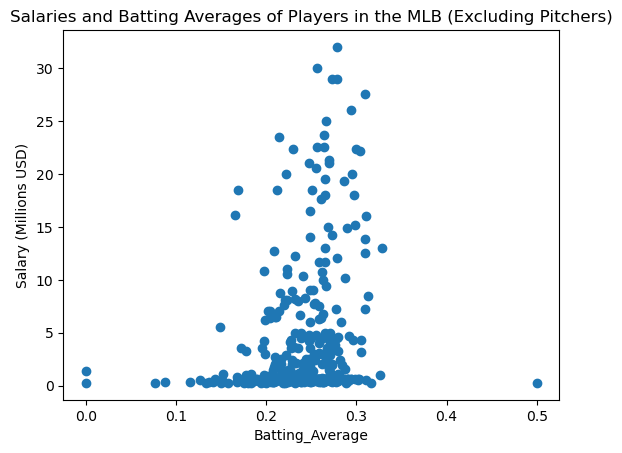

In [78]:
plt.scatter(Merged['Batting_Average'].loc[Merged['Position'] != 'P'].astype(float), Merged['Salary'].loc[Merged['Position'] != 'P']/1000000)
plt.xlabel('Batting_Average')
plt.ylabel('Salary (Millions USD)')
plt.title('Salaries and Batting Averages of Players in the MLB (Excluding Pitchers)')
plt.show()

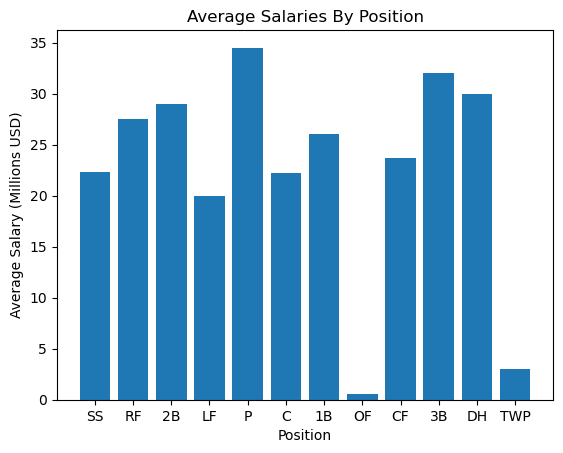

In [79]:
plt.bar(Merged['Position'], Merged['Salary']/1000000)
plt.xlabel('Position')
plt.ylabel('Average Salary (Millions USD)')
plt.title('Average Salaries By Position')
plt.show()

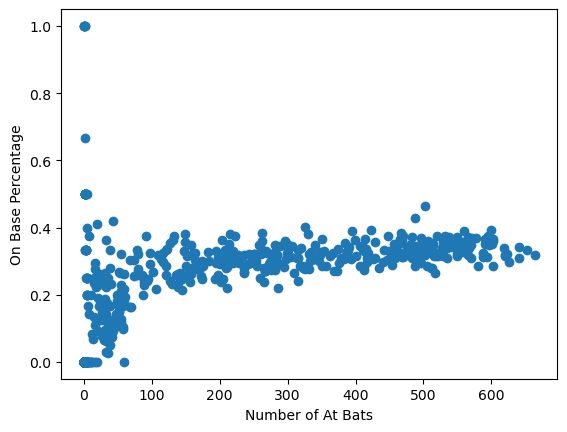

In [80]:
plt.scatter(Merged['At_Bats'], Merged['On_Base_Percentage'].astype(float))
plt.xlabel('Number of At Bats')
plt.ylabel('On Base Percentage')
plt.title('')
plt.show()

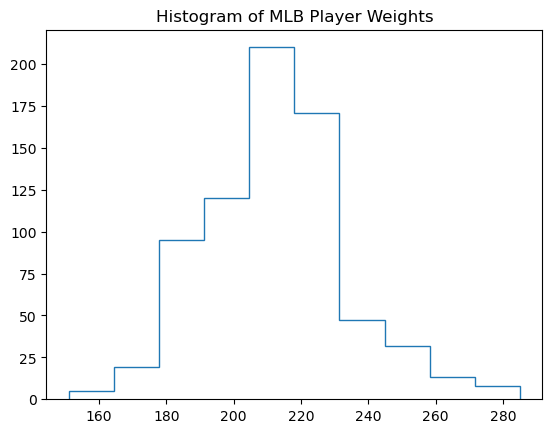

In [81]:
counts, bins = np.histogram(Merged['Weight'].astype(float))
plt.stairs(counts, bins)
plt.title('Histogram of MLB Player Weights')
plt.show()

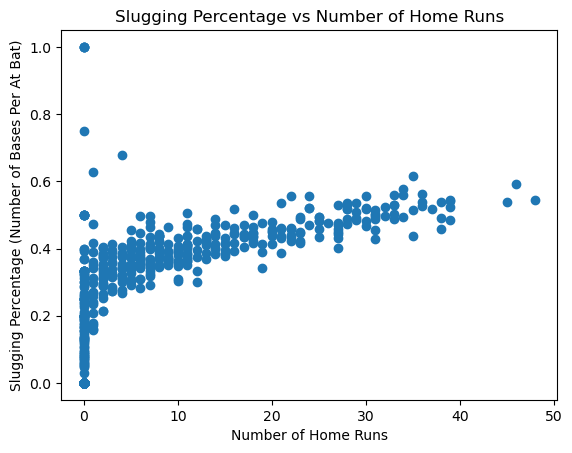

In [82]:
plt.scatter(Merged['Home_Runs'], Merged['Slugging'].astype(float))
plt.xlabel('Number of Home Runs')
plt.ylabel('Slugging Percentage (Number of Bases Per At Bat)')
plt.title('Slugging Percentage vs Number of Home Runs')
plt.show()

Example of final merged data, once again only displaying the data for the Arizona Diamondbacks:

In [83]:
pd.set_option('display.max_rows', None)
Merged[Merged['Team_Abbreviation'] == 'ARI']

,Full_Name,First_Name,Last_Name,Birthdate,Height,Weight,Throwing_Handedness,Batting_Handedness,Position,Number,Team_Abbreviation,Full_Team_Name,Salary,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,Doubles,Triples,Home_Runs,Runs_Batted_In,Stolen_Bases,Caught_Stealing,Walks,Strikeouts,Batting_Average,On_Base_Percentage,Slugging,On_Base_Plus_Slugging,On_Base_Plus_Slugging_Adjusted,Total_Bases,Ground_Double_Plays,Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flys,Intentional_Walks
0,Nick Ahmed,Nick,Ahmed,1990-03-15,"6' 2""",201,R,R,SS,13,ARI,arizona-diamondbacks,8125000,129,473,434,46,96,30,3,5,38,7,2,34,104,.221,.280,.339,.619,67,147,9,2,2,1,3
1,Kole Calhoun,Kole,Calhoun,1987-10-14,"5' 10""",205,L,L,RF,56,ARI,arizona-diamondbacks,8000000,51,182,166,17,39,8,0,5,17,1,0,15,41,.235,.297,.373,.670,81,62,2,0,0,1,0
2,Eduardo Escobar,Eduardo,Escobar,1989-01-05,"5' 10""",193,R,S,2B,5,ARI,arizona-diamondbacks,7666668,146,599,549,77,139,26,5,28,90,1,0,48,124,.253,.314,.472,.786,109,259,3,1,0,1,1
3,David Peralta,David,Peralta,1987-08-14,"6' 1""",210,L,L,LF,6,ARI,arizona-diamondbacks,7500000,150,538,487,57,126,30,8,8,63,2,1,46,92,.259,.325,.402,.728,96,196,9,3,0,2,3
4,Merrill Kelly,Merrill,Kelly,1988-10-14,"6' 2""",202,R,R,P,29,ARI,arizona-diamondbacks,4250000,27,58,47,1,3,1,0,0,1,0,0,4,27,.064,.137,.085,.222,-37,4,1,0,7,0,0
5,Joakim Soria,Joakim,Soria,1984-05-18,"6' 3""",205,R,R,P,48,ARI,arizona-diamondbacks,3500000,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Stephen Vogt,Stephen,Vogt,1984-11-01,"6' 0""",216,R,L,C,21,ARI,arizona-diamondbacks,3500000,78,238,210,24,41,6,1,7,25,0,0,26,56,.195,.283,.333,.616,65,70,2,0,1,1,2
7,Caleb Smith,Caleb,Smith,1991-07-28,"6' 0""",207,L,R,P,22,ARI,arizona-diamondbacks,1465000,45,25,22,2,2,1,0,0,0,1,0,1,14,.091,.167,.136,.303,-16,3,0,1,1,0,0
8,Christian Walker,Christian,Walker,1991-03-28,"6' 0""",208,R,R,1B,53,ARI,arizona-diamondbacks,619300,115,445,401,55,98,23,1,10,46,0,0,38,106,.244,.315,.382,.696,88,153,8,4,0,2,1
9,Pavin Smith,Pavin,Smith,1996-02-06,"6' 2""",208,L,L,RF,26,ARI,arizona-diamondbacks,586600,145,545,498,68,133,27,4,11,49,1,0,42,106,.267,.328,.404,.732,98,201,11,4,0,1,1
